# Students' Academic Performance Dataset
# (xAPI-Educational Mining Dataset)

## Описание набора данных

[Источник](https://www.kaggle.com/aljarah/xAPI-Edu-Data)

Рассматриваемые данные собраны с использованием инструмента отслеживания активности учеников, который называется "experience API" (xAPI).

Цель: определить успеваемость ученика по набору остальных признаков.

Подключаем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('precision', 3)

Считываем данные из файла с форматом csv (Comma-Separated Values).

In [4]:
data = pd.read_csv('xAPI-Edu-Data.csv', sep=',', engine='python')

Посмотрим более подробную информацию о столбцах.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


Первые пять строк из рассматриваемого набора данных:

In [6]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Можно заметить, что названия столбцов не выдержаны в едином стиле. Исправим это с помощью функции rename().

In [7]:
data.rename(columns={'gender': 'Gender', 
                     'NationalITy': 'Nationality', 
                     'PlaceofBirth': 'PlaceOfBirth', 
                     'raisedhands': 'RaisedHands', 
                     'VisITedResources': 'VisitedResources',
                     'ParentschoolSatisfaction': 'ParentSchoolSatisfaction'
                    }, inplace=True)

Посмотрим, например, на последние пять строк после изменения названий колонок.

In [8]:
data.tail()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


Посмотрим размер нашего набора данных: кол-во учеников (строки) и кол-во признаков (столбцы), а также названия столбцов.

In [9]:
print(data.shape)
print(data.columns)

(480, 17)
Index(['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentSchoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


Кроме того, есть возможность посмотреть небольшую статистику:

In [10]:
data.describe(include=['object'])

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [11]:
data.describe(exclude=['object'])

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


## Обработка данных

Сначала проверим, есть ли пропущенные значения.

In [12]:
data.count(axis=0)

Gender                      480
Nationality                 480
PlaceOfBirth                480
StageID                     480
GradeID                     480
SectionID                   480
Topic                       480
Semester                    480
Relation                    480
RaisedHands                 480
VisitedResources            480
AnnouncementsView           480
Discussion                  480
ParentAnsweringSurvey       480
ParentSchoolSatisfaction    480
StudentAbsenceDays          480
Class                       480
dtype: int64

Видно, что пропущенных значений в рассматриваемом наборе данных нет.

Количественные и категориальные признаки обрабатываются по-разному, поэтому отделим одни от других. 

In [13]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(numerical_columns)
print(categorical_columns)

['RaisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion']
['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays', 'Class']


### Нормализация количественных признаков

Посмотрим статистику количественных признаков:

In [14]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


Некоторые алгоритмы машинного обучения чувствительны к масштабированию данных, поэтому произведём нормализацию количественных признаков.

In [15]:
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [16]:
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00


### Обработка категориальных признаков

Посмотрим, какие уникальные значения принимает каждый из категориальных признаков:

In [17]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceOfBirth: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mum']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


В некоторых значениях допущены ошибки и опечатки, поэтому сделаем небольшую корректировку.

In [18]:
data['Nationality'].replace(to_replace={'KW': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                            inplace=True)
data['PlaceOfBirth'].replace(to_replace={'KuwaIT': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                             inplace=True)
data['StageID'].replace(to_replace={'lowerlevel': 'Lowerlevel'}, inplace=True)
data['Relation'].replace(to_replace={'Mum': 'Mother'}, inplace=True)

Посмотрим ещё раз на уникальные значения.

In [19]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Libya']
PlaceOfBirth: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Libya']
StageID: ['Lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mother']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


### Визуализация

Посмотрим на некоторые зависимости признаков с помощью различных графиков.

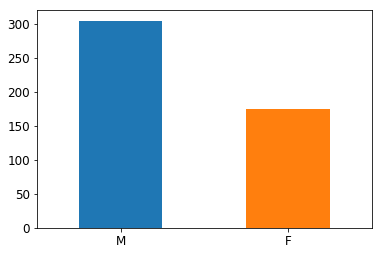

In [20]:
data['Gender'].value_counts().plot(kind='bar', rot=0, fontsize=12);

Большая часть учеников является представителями мужского пола.

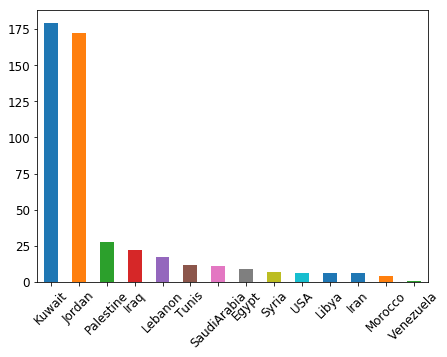

In [21]:
data['Nationality'].value_counts().plot(kind='bar', rot=45, figsize=(7, 5), fontsize=12);

Из графика ясно видно, что подавляющее число рассматриваемых учеников имеют гражданство Кувейта или Иордании.

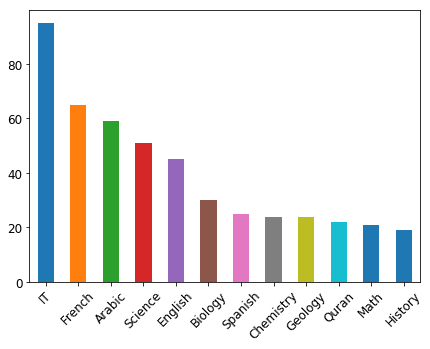

In [22]:
data['Topic'].value_counts().plot(kind='bar', rot=45, figsize=(7, 5), fontsize=12);

Наиболее популярной темой среди учеников является сфера информационных технологий, в то время как изучение Корана, математики и истории интересно менее остальных тем.

Посмотрим, на распределение успеваемости среди учеников:

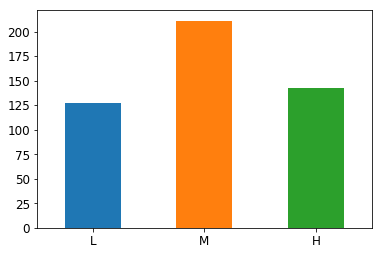

In [23]:
data['Class'].value_counts().loc[list('LMH')].plot(kind='bar', rot=0, fontsize=12);

График зависимости посещения и успеваемости:

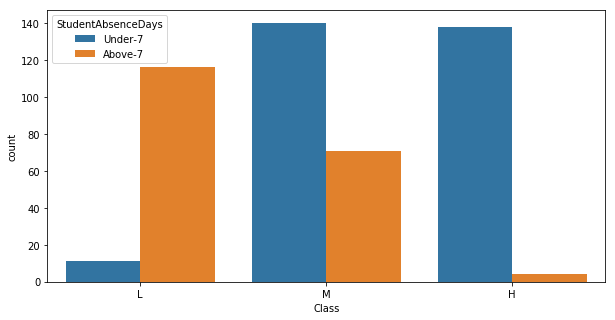

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Class", hue="StudentAbsenceDays", data=data, order=['L', 'M', 'H']);

Выглядит довольно логично: в общем случае успеваемость прямо пропорциональна посещению.

График зависимости успеваемости и удовлетворения родителей ученика:

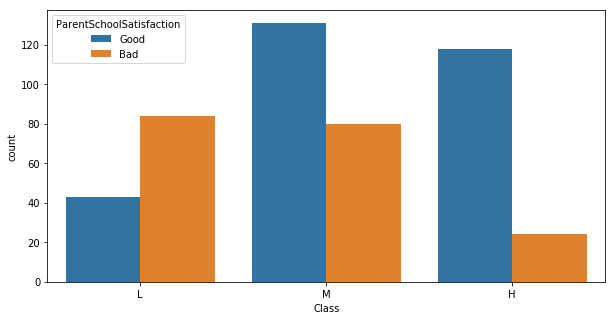

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Class", hue="ParentSchoolSatisfaction", data=data, order=['L', 'M', 'H']);

Также предсказуемые результаты: чем выше успеваемость ученика, тем более довольны его родители.

### Векторизация

Разделим категориальные признаки на бинарные и небинарные:

In [26]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns)
print(nonbinary_columns)

['Gender', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays']
['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


Для каждого бинарного признака закодируем одно из его значений нулём, а другое единицей.

In [27]:
data.at[data['Gender'] == 'F', 'Gender'] = 0
data.at[data['Gender'] == 'M', 'Gender'] = 1

In [28]:
data['Gender'].describe()

count    480.000
mean       0.635
std        0.482
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        1.000
Name: Gender, dtype: float64

In [29]:
data.at[data['Semester'] == 'F', 'Semester'] = 0
data.at[data['Semester'] == 'S', 'Semester'] = 1

In [30]:
data['Semester'].describe()

count    480.00
mean       0.49
std        0.50
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Semester, dtype: float64

In [31]:
data.at[data['Relation'] == 'Mother', 'Relation'] = 0
data.at[data['Relation'] == 'Father', 'Relation'] = 1

In [32]:
data['Relation'].describe()

count    480.000
mean       0.590
std        0.492
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        1.000
Name: Relation, dtype: float64

In [33]:
data.at[data['ParentAnsweringSurvey'] == 'No', 'ParentAnsweringSurvey'] = 0
data.at[data['ParentAnsweringSurvey'] == 'Yes', 'ParentAnsweringSurvey'] = 1

In [34]:
data['ParentAnsweringSurvey'].describe()

count    480.000
mean       0.562
std        0.497
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        1.000
Name: ParentAnsweringSurvey, dtype: float64

In [35]:
data.at[data['ParentSchoolSatisfaction'] == 'Bad', 'ParentSchoolSatisfaction'] = 0
data.at[data['ParentSchoolSatisfaction'] == 'Good', 'ParentSchoolSatisfaction'] = 1

In [36]:
data['ParentSchoolSatisfaction'].describe()

count    480.000
mean       0.608
std        0.489
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        1.000
Name: ParentSchoolSatisfaction, dtype: float64

In [37]:
data.at[data['StudentAbsenceDays'] == 'Under-7', 'StudentAbsenceDays'] = 0
data.at[data['StudentAbsenceDays'] == 'Above-7', 'StudentAbsenceDays'] = 1

In [38]:
data['StudentAbsenceDays'].describe()

count    480.000
mean       0.398
std        0.490
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        1.000
Name: StudentAbsenceDays, dtype: float64

In [39]:
data['StudentAbsenceDays'].unique()

array([0, 1], dtype=int64)

К небинарными признакам применим метод векторизации, который заключается в следующем: признак j, принимающий s значений, заменим на s признаков, принимающих значения 0 или 1.

In [40]:
print(nonbinary_columns)

['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


In [41]:
nonbinary_columns.remove('Class')

In [42]:
class_column = data['Class']

In [43]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Nationality_Egypt', 'Nationality_Iran', 'Nationality_Iraq',
       'Nationality_Jordan', 'Nationality_Kuwait', 'Nationality_Lebanon',
       'Nationality_Libya', 'Nationality_Morocco', 'Nationality_Palestine',
       'Nationality_SaudiArabia', 'Nationality_Syria', 'Nationality_Tunis',
       'Nationality_USA', 'Nationality_Venezuela', 'PlaceOfBirth_Egypt',
       'PlaceOfBirth_Iran', 'PlaceOfBirth_Iraq', 'PlaceOfBirth_Jordan',
       'PlaceOfBirth_Kuwait', 'PlaceOfBirth_Lebanon', 'PlaceOfBirth_Libya',
       'PlaceOfBirth_Morocco', 'PlaceOfBirth_Palestine',
       'PlaceOfBirth_SaudiArabia', 'PlaceOfBirth_Syria', 'PlaceOfBirth_Tunis',
       'PlaceOfBirth_USA', 'PlaceOfBirth_Venezuela', 'StageID_HighSchool',
       'StageID_Lowerlevel', 'StageID_MiddleSchool', 'GradeID_G-02',
       'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07',
       'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11',
       'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID

### Объединение данных

Объединим все обработанные данные в одну таблицу:

In [44]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis=1)
print(data.shape)

(480, 66)


In [45]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_Kuwait,Nationality_Lebanon,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Gender,Semester,Relation,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02,480.000,480.000,480.000,480.000,480.000,480.000,...,480.000,480.000,480.000,480.000,480.000,480.00,480.000,480.000,480.000,480.000
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17,0.019,0.013,0.046,0.358,0.373,0.035,...,0.044,0.046,0.106,0.052,0.635,0.49,0.590,0.562,0.608,0.398
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.136,0.111,0.209,0.480,0.484,0.185,...,0.205,0.209,0.308,0.222,0.482,0.50,0.492,0.497,0.489,0.490
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.00,1.000,1.000,1.000,0.000
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01,0.000,0.000,0.000,1.000,1.000,0.000,...,0.000,0.000,0.000,0.000,1.000,1.00,1.000,1.000,1.000,1.000
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000


## Классификация

Подключаем реализации некоторых методов машинного обучения из библиотеки sklearn:

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from math import sqrt

Для удобства введём некоторое кол-во функций, которые позже будут часто использоваться.

In [47]:
def do_magic(classifier_name, classifier, parameters_dict, results):
    from copy import deepcopy
    best_parameters = {}
    
    for parameter_name, parameter_values in parameters_dict.items():
        clf = deepcopy(classifier)
        errors_dict = get_errors_dict(clf, parameter_name, parameter_values, train_test_split_data)
        plot_errors(classifier_name, parameter_name, parameter_values, errors_dict)
        plt.show()

        best_parameter_value, min_error = get_best_parameter_value(parameter_values, errors_dict.get('CV'))
        clf.set_params(**{parameter_name: best_parameter_value}).fit(x_train, y_train)
        print('Min CV-error: {0:.3g} ({1}: {2:.3g})'.format(min_error, parameter_name, best_parameter_value))

        train_error, test_error = get_errors(clf, train_test_split_data)
        print_errors(train_error, test_error)
        
        best_parameters[parameter_name] = best_parameter_value
    
    if (len(best_parameters) > 1):
        s = "\n\nModel with best parameters ("
        for name, value in best_parameters.items():
            clf = classifier.set_params(**{name: value})
            s = s + name + "=" + str(value) + ", "
        clf.fit(x_train, y_train)
        train_error, test_error = get_errors(clf, train_test_split_data)
        s = s[:-2] + "):"
        print(s)
        print_errors(train_error, test_error)
    
    save_results(classifier_name, train_error, test_error, results)

In [48]:
def get_errors_dict(classifier, parameter_name, parameter_values, train_test_split_data):
    errors_dict = {'Train': [],
                   'Test': [],
                   'CV': []}
    x_train, x_test, y_train, y_test = train_test_split_data
    
    for i in parameter_values:
        clf = classifier.set_params(**{parameter_name: i})
        clf.fit(x_train, y_train)
        
        train_error, test_error = get_errors(clf, train_test_split_data)
        errors_dict['Train'].append(train_error)
        errors_dict['Test'].append(test_error)
        
        cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=13)
        scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
        errors_dict['CV'].append(1 - scores.mean())
        
    if (hasattr(clf, 'oob_score')):
        errors_dict['OOB'] = [1 - classifier.set_params(**{parameter_name: i}).fit(x_train, y_train).oob_score_ 
                              for i in parameter_values]
    
    return errors_dict

In [49]:
def get_errors(classifier, train_test_split_data):
    x_train, x_test, y_train, y_test = train_test_split_data
    
    train_error = np.mean(y_train != classifier.predict(x_train))
    test_error = np.mean(y_test != classifier.predict(x_test))
    
    return train_error, test_error

In [50]:
def plot_errors(classifier_name, parameter_name, parameter_values, errors_dict):
    fontsize = 15
    for label, error_values in errors_dict.items():
        plt.plot(parameter_values, error_values, '.-', label=label)
    plt.title(classifier_name, size=fontsize)
    plt.xlabel(parameter_name, size=fontsize)
    plt.xticks(size=fontsize)
    plt.ylabel('Error', size=fontsize)
    plt.yticks(size=fontsize)
    plt.legend(fontsize=fontsize);

In [51]:
def get_best_parameter_value(parameter_values, error_values):
    min_error = min(error_values)
    best_parameter_value = parameter_values[error_values.index(min_error)]
    return best_parameter_value, min_error

In [52]:
def print_errors(train_error, test_error):
    print("Train error: {0:.3g}\nTest error: {1:.3g}".format(train_error.item(), test_error.item()))

In [53]:
def save_results(classifier_name, train_error, test_error, results):
    results.loc[classifier_name] = [train_error, test_error]

Разделим все данные на обучающую и тестовую выборки в соотношении 70:30 соответственно.

In [54]:
x = data
y = class_column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
train_test_split_data = list((x_train, x_test, y_train, y_test))

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(336, 66) (144, 66)
(336,) (144,)


Создадим таблицу, в которую будем заносить результаты классификаторов.

In [55]:
results = pd.DataFrame([], columns=['Train Error', 'Test Error'])

# kNN

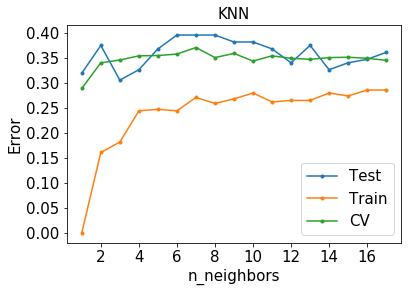

Min CV-error: 0.289 (n_neighbors: 1)
Train error: 0
Test error: 0.319


In [56]:
knn_parameters_dict = {'n_neighbors': range(1, int(sqrt(x_train.shape[0])))}
do_magic('KNN', KNeighborsClassifier(), knn_parameters_dict, results)

# LDA

In [57]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
train_error, test_error = get_errors(lda, train_test_split_data)
print_errors(train_error, test_error)
save_results('LDA', train_error, test_error, results)

Train error: 0.164
Test error: 0.306


# QDA

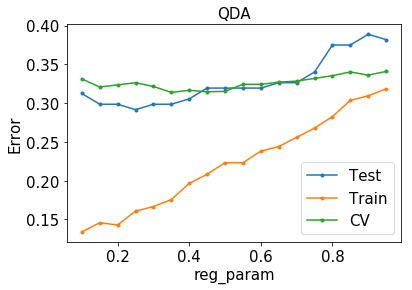

Min CV-error: 0.314 (reg_param: 0.35)
Train error: 0.176
Test error: 0.299


In [58]:
qda_parameters_dict = {'reg_param': np.arange(0.1, 1.0, 0.05)}
do_magic('QDA', QuadraticDiscriminantAnalysis(), qda_parameters_dict, results)

# Logistic Regression

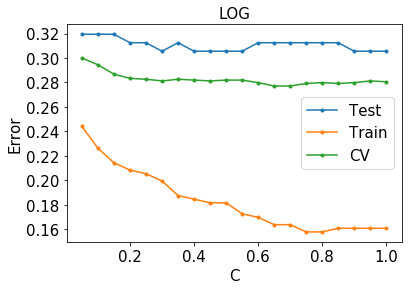

Min CV-error: 0.277 (C: 0.65)
Train error: 0.164
Test error: 0.312


In [59]:
log_reg_parameters_dict = {'C': np.arange(0.05, 1.01, 0.05)}
do_magic('LOG', LogisticRegression(), log_reg_parameters_dict, results)

# SVM

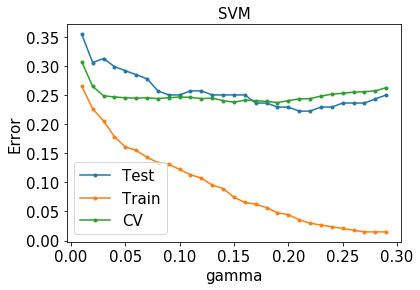

Min CV-error: 0.237 (gamma: 0.19)
Train error: 0.0476
Test error: 0.229


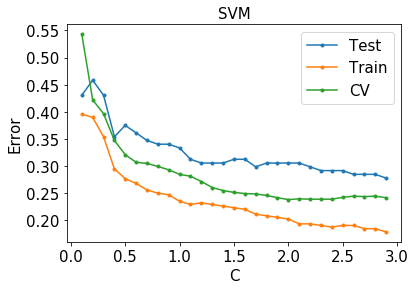

Min CV-error: 0.238 (C: 2)
Train error: 0.202
Test error: 0.306


Model with best parameters (gamma=0.19, C=2.0):
Train error: 0.00893
Test error: 0.208


In [60]:
svm_parameters_dict = {'C': np.arange(0.1, 3, 0.1),
                      'gamma': np.arange(0.01, 0.3, 0.01)}
do_magic('SVM', SVC(), svm_parameters_dict, results)

# Naive Bayes

In [61]:
gnb = GaussianNB().fit(x_train, y_train)
train_error, test_error = get_errors(gnb, train_test_split_data)
print_errors(train_error, test_error)
save_results('GNB', train_error, test_error, results)

Train error: 0.473
Test error: 0.542


In [62]:
bnb = BernoulliNB().fit(x_train, y_train)
train_error, test_error = get_errors(bnb, train_test_split_data)
print_errors(train_error, test_error)
save_results('BNB', train_error, test_error, results)

Train error: 0.247
Test error: 0.375


# Random Forest

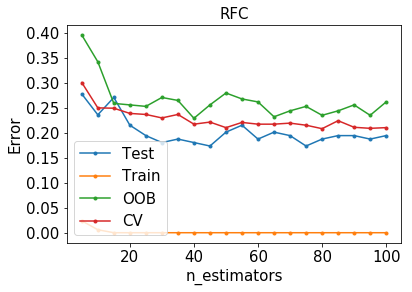

Min CV-error: 0.208 (n_estimators: 80)
Train error: 0
Test error: 0.167


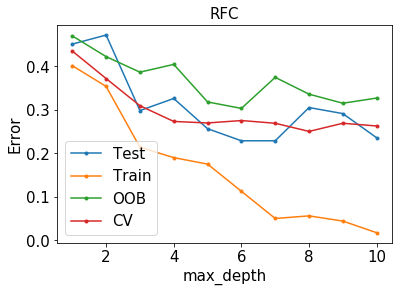

Min CV-error: 0.251 (max_depth: 8)
Train error: 0.0595
Test error: 0.271


Model with best parameters (n_estimators=80, max_depth=8):
Train error: 0.0179
Test error: 0.181


In [63]:
rfc_parameters_dict = {'n_estimators': range(5, 101, 5),
                      'max_depth': range(1, 11, 1)}
do_magic('RFC', RandomForestClassifier(oob_score=True), rfc_parameters_dict, results)

# Extremely Randomized Trees

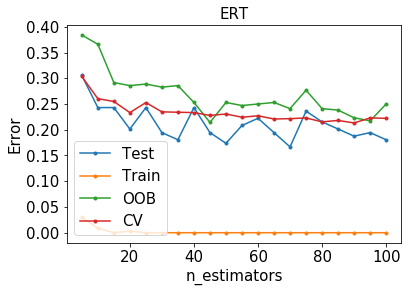

Min CV-error: 0.213 (n_estimators: 90)
Train error: 0
Test error: 0.181


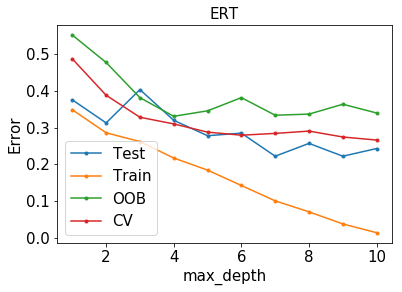

Min CV-error: 0.266 (max_depth: 10)
Train error: 0.0417
Test error: 0.25


Model with best parameters (n_estimators=90, max_depth=10):
Train error: 0.00595
Test error: 0.194


In [64]:
ert_parameters_dict = {'n_estimators': range(5, 101, 5),
                      'max_depth': range(1, 11, 1)}
do_magic('ERT', ExtraTreesClassifier(bootstrap=True, oob_score=True), ert_parameters_dict, results)

# AdaBoost

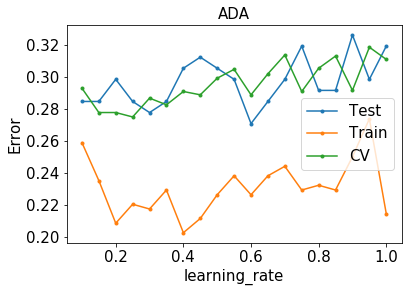

Min CV-error: 0.275 (learning_rate: 0.25)
Train error: 0.22
Test error: 0.285


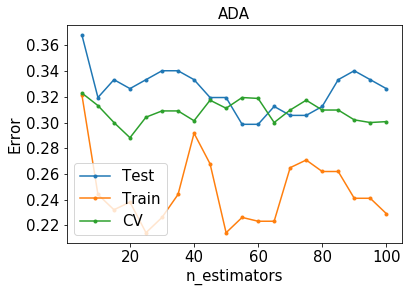

Min CV-error: 0.288 (n_estimators: 20)
Train error: 0.238
Test error: 0.326


Model with best parameters (learning_rate=0.25, n_estimators=20):
Train error: 0.25
Test error: 0.278


In [65]:
ada_parameters_dict = {'n_estimators': range(5, 101, 5),
                      'learning_rate': np.arange(0.1, 1.01, 0.05)}
do_magic('ADA', AdaBoostClassifier(), ada_parameters_dict, results)

# GBT

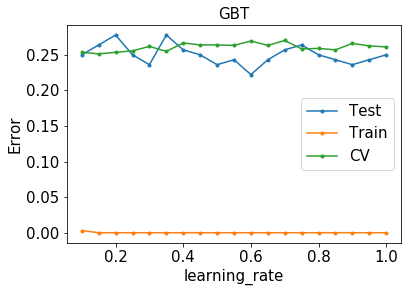

Min CV-error: 0.251 (learning_rate: 0.15)
Train error: 0
Test error: 0.264


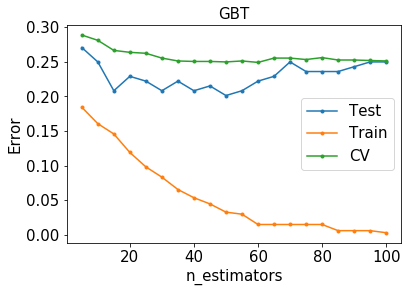

Min CV-error: 0.249 (n_estimators: 60)
Train error: 0.0149
Test error: 0.215


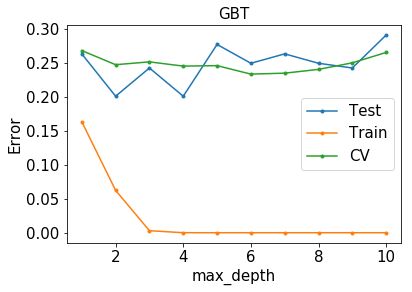

Min CV-error: 0.234 (max_depth: 6)
Train error: 0
Test error: 0.25


Model with best parameters (learning_rate=0.15, n_estimators=60, max_depth=6):
Train error: 0
Test error: 0.243


In [66]:
gbt_parameters_dict = {'n_estimators': range(5, 101, 5),
                      'learning_rate': np.arange(0.1, 1.01, 0.05),
                      'max_depth': range(1, 11, 1)}
do_magic('GBT', GradientBoostingClassifier(), gbt_parameters_dict, results)

# Results

In [67]:
results.sort_values(by='Test Error', inplace=True)

In [68]:
results

,Train Error,Test Error
RFC,0.018,0.181
ERT,0.006,0.194
SVM,0.009,0.208
GBT,0.000,0.243
ADA,0.250,0.278
QDA,0.176,0.299
LDA,0.164,0.306
LOG,0.164,0.312
KNN,0.000,0.319
BNB,0.247,0.375


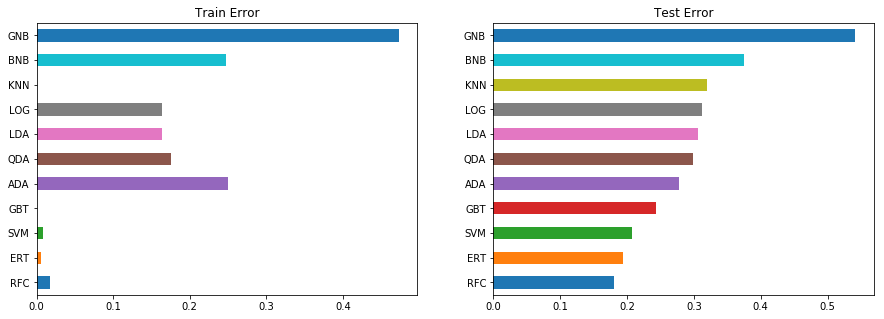

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
results['Train Error'].plot(kind='barh', title='Train Error', ax=ax1)
results['Test Error'].plot(kind='barh', title='Test Error', ax=ax2);

Из графиков видно, что на рассматриваемом наборе данных наилучшие результаты показывает алгоритм Random Forest.

## Значимость признаков

Некоторые алгоритмы классификации после обучения могут определить, какие признаков наиболее значимые. Одним из таких алгоритмов является Decision Tree.

In [70]:
feature_names = x.columns.values

In [71]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
train_error, test_error = get_errors(dtc, train_test_split_data)
print_errors(train_error, test_error)

Train error: 0
Test error: 0.354


In [72]:
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]

Посмотрим на 20 наиболее значимых признаков:

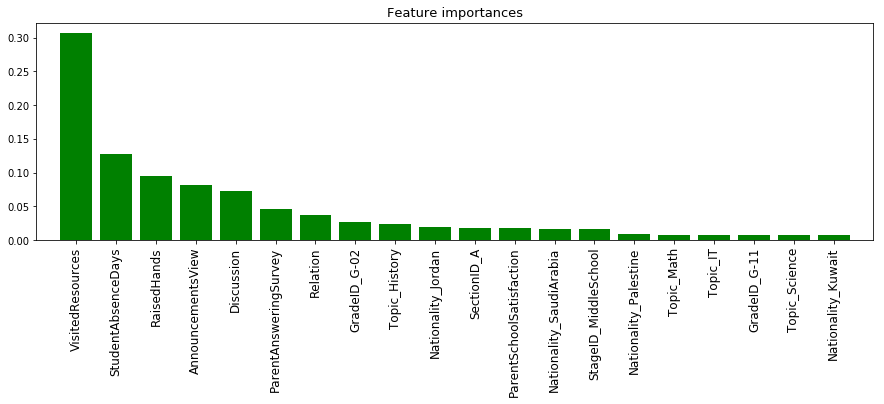

In [73]:
d_first = 20
plt.figure(figsize=(15, 4))
plt.title("Feature importances", fontsize=13)
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='g')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation=90, fontsize=12)
plt.xlim([-1, d_first]);

В целом, картина довольно логична. Такие признаки, как пол, национальность и место рождения не должны влиять на успеваемость ученика.

Посмотрим на результаты тех же классификаторов после уменьшения кол-ва признаков.

In [74]:
selected_features = feature_names[indices[:7]]
selected_features

array(['VisitedResources', 'StudentAbsenceDays', 'RaisedHands',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'Relation'], dtype=object)

In [75]:
reduced_data = data[selected_features]

In [76]:
reduced_data.head()

,VisitedResources,StudentAbsenceDays,RaisedHands,AnnouncementsView,Discussion,ParentAnsweringSurvey,Relation
0,-1.173,0,-1.032,-1.350,-0.842,1,1
1,-1.052,0,-0.870,-1.312,-0.662,1,1
2,-1.445,1,-1.195,-1.425,-0.481,0,1
3,-0.901,1,-0.545,-1.237,-0.300,0,1
4,-0.145,1,-0.220,-0.974,0.243,0,1


In [77]:
x = reduced_data
y = class_column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
train_test_split_data = list((x_train, x_test, y_train, y_test))

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(336, 7) (144, 7)
(336,) (144,)


In [78]:
results_after_reducing = pd.DataFrame([], columns=['Train Error', 'Test Error'])

# kNN

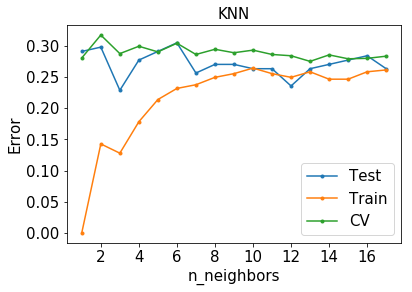

Min CV-error: 0.276 (n_neighbors: 13)
Train error: 0.259
Test error: 0.264


In [79]:
do_magic('KNN', KNeighborsClassifier(), knn_parameters_dict, results_after_reducing)

# LDA

In [80]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
train_error, test_error = get_errors(lda, train_test_split_data)
print_errors(train_error, test_error)
save_results('LDA', train_error, test_error, results_after_reducing)

Train error: 0.214
Test error: 0.299


# QDA

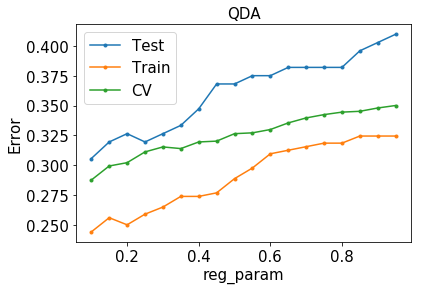

Min CV-error: 0.287 (reg_param: 0.1)
Train error: 0.244
Test error: 0.306


In [81]:
do_magic('QDA', QuadraticDiscriminantAnalysis(), qda_parameters_dict, results_after_reducing)

# Logistic Regression

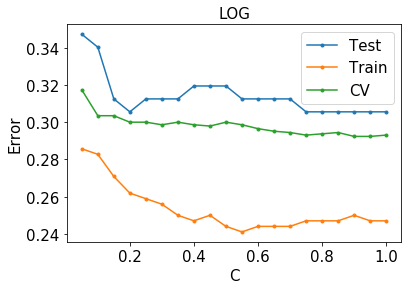

Min CV-error: 0.292 (C: 0.9)
Train error: 0.25
Test error: 0.306


In [82]:
do_magic('LOG', LogisticRegression(), log_reg_parameters_dict, results_after_reducing)

# SVM

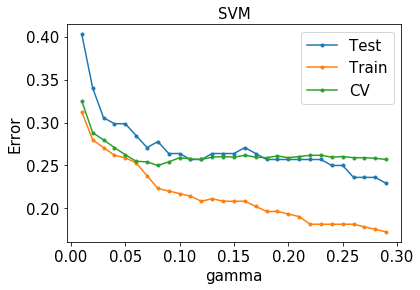

Min CV-error: 0.25 (gamma: 0.08)
Train error: 0.223
Test error: 0.278


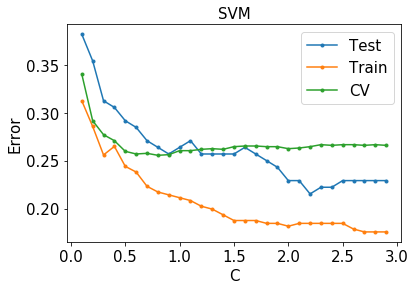

Min CV-error: 0.256 (C: 0.8)
Train error: 0.217
Test error: 0.264


Model with best parameters (gamma=0.08, C=0.8):
Train error: 0.25
Test error: 0.278


In [83]:
do_magic('SVM', SVC(), svm_parameters_dict, results_after_reducing)

# Naive Bayes

In [84]:
gnb = GaussianNB().fit(x_train, y_train)
train_error, test_error = get_errors(gnb, train_test_split_data)
print_errors(train_error, test_error)
save_results('GNB', train_error, test_error, results_after_reducing)

Train error: 0.256
Test error: 0.271


In [85]:
bnb = BernoulliNB().fit(x_train, y_train)
train_error, test_error = get_errors(bnb, train_test_split_data)
print_errors(train_error, test_error)
save_results('BNB', train_error, test_error, results_after_reducing)

Train error: 0.259
Test error: 0.319


# Random Forest

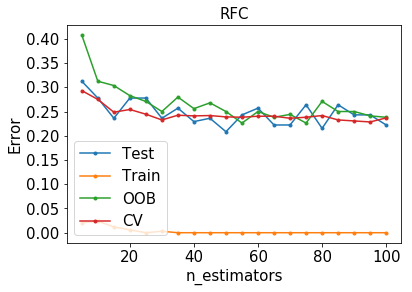

Min CV-error: 0.228 (n_estimators: 95)
Train error: 0
Test error: 0.243


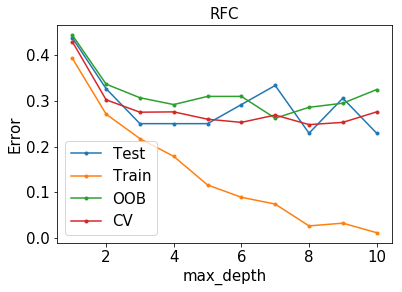

Min CV-error: 0.248 (max_depth: 8)
Train error: 0.0327
Test error: 0.236


Model with best parameters (n_estimators=95, max_depth=8):
Train error: 0.0208
Test error: 0.243


In [86]:
do_magic('RFC', RandomForestClassifier(oob_score=True), rfc_parameters_dict, results_after_reducing)

# Extremely Randomized Trees

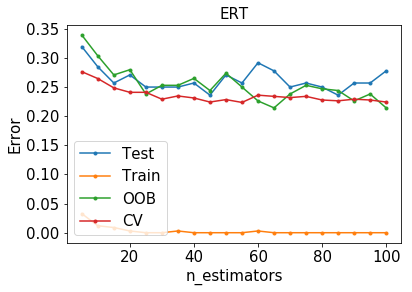

Min CV-error: 0.224 (n_estimators: 55)
Train error: 0
Test error: 0.257


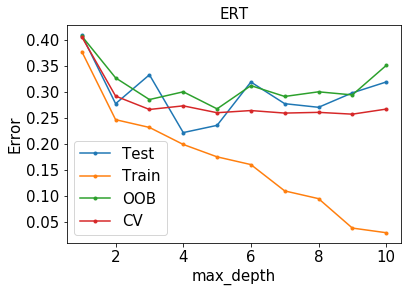

Min CV-error: 0.258 (max_depth: 9)
Train error: 0.0565
Test error: 0.271


Model with best parameters (n_estimators=55, max_depth=9):
Train error: 0.0357
Test error: 0.257


In [87]:
do_magic('ERT', ExtraTreesClassifier(bootstrap=True, oob_score=True), ert_parameters_dict, results_after_reducing)

# AdaBoost

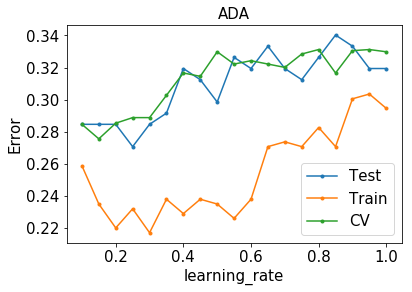

Min CV-error: 0.276 (learning_rate: 0.15)
Train error: 0.235
Test error: 0.285


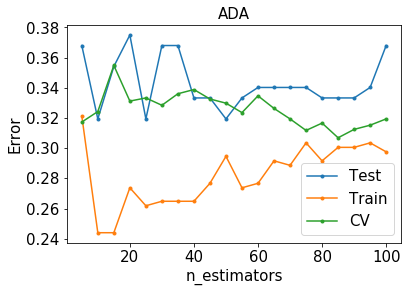

Min CV-error: 0.307 (n_estimators: 85)
Train error: 0.301
Test error: 0.333


Model with best parameters (learning_rate=0.15, n_estimators=85):
Train error: 0.214
Test error: 0.271


In [88]:
do_magic('ADA', AdaBoostClassifier(), ada_parameters_dict, results_after_reducing)

# GBT

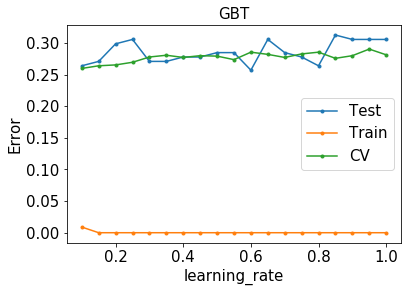

Min CV-error: 0.26 (learning_rate: 0.1)
Train error: 0.00893
Test error: 0.264


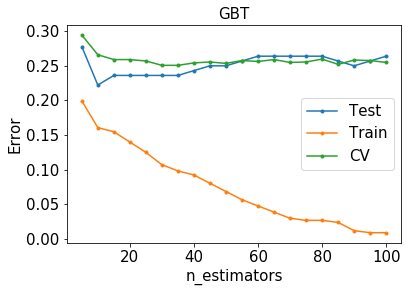

Min CV-error: 0.251 (n_estimators: 30)
Train error: 0.107
Test error: 0.236


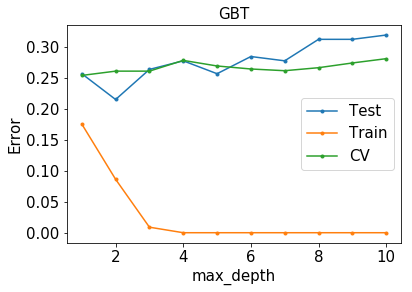

Min CV-error: 0.254 (max_depth: 1)
Train error: 0.176
Test error: 0.257


Model with best parameters (learning_rate=0.1, n_estimators=30, max_depth=1):
Train error: 0.208
Test error: 0.264


In [89]:
do_magic('GBT', GradientBoostingClassifier(), gbt_parameters_dict, results_after_reducing)

# Results after reducing a number of features

In [90]:
results_after_reducing.sort_values(by='Test Error', inplace=True)

In [91]:
results_after_reducing

,Train Error,Test Error
RFC,0.021,0.243
ERT,0.036,0.257
KNN,0.259,0.264
GBT,0.208,0.264
GNB,0.256,0.271
ADA,0.214,0.271
SVM,0.250,0.278
LDA,0.214,0.299
QDA,0.244,0.306
LOG,0.250,0.306


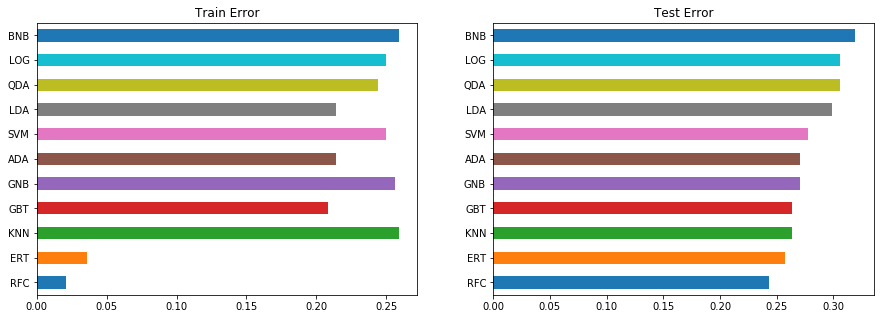

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
results_after_reducing['Train Error'].plot(kind='barh', title='Train Error', ax=ax1)
results_after_reducing['Test Error'].plot(kind='barh', title='Test Error', ax=ax2);

In [93]:
all_results = results.sort_index().join(results_after_reducing.sort_index(), rsuffix=' AR')
all_results['Test Error Change, %'] = 100 * (all_results['Test Error AR'] - all_results['Test Error']) / all_results['Test Error']

In [94]:
all_results.sort_values(by='Test Error Change, %')

,Train Error,Test Error,Train Error AR,Test Error AR,"Test Error Change, %"
GNB,0.473,0.542,0.256,0.271,-50.000
KNN,0.000,0.319,0.259,0.264,-17.391
BNB,0.247,0.375,0.259,0.319,-14.815
ADA,0.250,0.278,0.214,0.271,-2.500
LDA,0.164,0.306,0.214,0.299,-2.273
LOG,0.164,0.312,0.250,0.306,-2.222
QDA,0.176,0.299,0.244,0.306,2.326
GBT,0.000,0.243,0.208,0.264,8.571
ERT,0.006,0.194,0.036,0.257,32.143
SVM,0.009,0.208,0.250,0.278,33.333


Алгоритмы KNN и Naive Bayes показали более высокую точность после уменьшения кол-ва признаков, в то время как ансамблевые алгоритмы (RFC, ERT, GBT) и алгоритм SVM ухудшили свои результаты.

## Итог:
Наименьшую ошибку классификации, равную 0.181, показал алгоритм Random Forest при обучении на всех признаках.